# Implementation of Backpropagation in a 3-layer Neural Network

In this notebook, we will implement a 3-Layer Neural Network with the following structure.
<br> Layers: {1−64−𝑅𝑒𝐿𝑈−64−𝑅𝑒𝐿𝑈−64−1−𝑠𝑖𝑔𝑚𝑜𝑖𝑑}

We will be using the following algorithm to build our network: <br>
1. Ask the user for the mean and standard deviation of a 1D Gaussian that will be used to build the input dataset.
2. Build the data set, visualize it, and split it into train (90%) and test(10%).
3. Define the activation functions to be used. 
4. Initialize the weights using a Gaussian distribution with zero mean and std=0.01.
5. Define the forward propagation method.
6. Compute for the cost.
7. Define the backward propagation function and optimization
8. Train the model using the train dataset
8. Predict and visualize the output

### 1. Packages
 We are restricted in using only the following packages.
 <ul>
    <li> <em>numpy</em> is the main package for scientific computing with Python.</li>
    <li> <em>matplotlib</em> is a library to plot graphs in Python.</li>
</ul>
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Building your dataset and defining the activation functions
First, we define a function <em>gaussian_1d</em> that will draw 1,000,000 random samples from a 1D Gaussian
<br>Next, we  build a dataset <em>data</em> with 1000 histogram bins from it.
<br>From the dataset, we split it into train and test. 

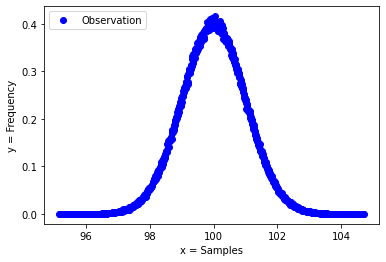

In [2]:
def gaussian_1d(mean, std, model=True):
    samples = np.random.normal(mean, std, 1000000)
    freq, edges = np.histogram(samples, 1000, density=True)
    plt.plot(edges[:-1], freq, 'o', color='b', label="Observation")
    plt.rc('axes', labelsize=14)
    plt.xlabel('x = Samples')
    plt.legend(loc='upper left')
    plt.ylabel('y = Frequency')
    plt.savefig("gaussian_samples.png")
    plt.show()
    plt.close('all')
    return edges[:-1], freq

#mean = float(input("Mean = "))
#std = float(input ("Standard Deviation = "))
mean = 100
std = 1
x, freq = gaussian_1d(mean, std)
len_dataset = len(x)
train_length = int(0.9 * len_dataset)
x_train, y_train = x[:train_length][:, np.newaxis], freq[:train_length][:, np.newaxis]
x_test, y_test = x[train_length:][:, np.newaxis], freq[train_length:][:, np.newaxis]

# Define the activation functions to be used
def ReLU(Z):
    A = np.maximum(0, Z)
    return A

def ReLU_prime(A):
    A[A <= 0] = 0
    A[A > 0] = 1
    return A
    
def sigmoid(Z):   
    A = 1/(1 + np.exp(-Z)) 
    return A

def sigmoid_prime(A):
    return A*(1-A)

### 3. Initialization
We initialize our parameters, weights and biases. <br>
<strong>Instructions </strong> <br>
<ul> 
    <li> As required, use Gaussian distribution with mean = 0 and standard deviation = 0.01 to initialize our weights. Use np.random.normal(mean, std, 64) </li>
    <li> As chosen, use zero initialization for the biases. Use np.zeros(shape).

In [3]:
# define the mean and standard deviation to be used for the weights
mean_i = 0
std_i = 0.01

# Determine the size of our layers
def initialize_params():
    W1 = np.random.normal(mean_i, std_i, 64)
    W1 = W1.reshape(64, 1)
    b1 = np.zeros(shape = (64, 1)) 

    W2 = np.random.normal(mean_i, std_i, 64*64)
    W2 = W2.reshape(64, 64)
    b2 = np.zeros(shape =(64, 1))
    
    W3 = np.random.normal(mean_i, std_i, 64)
    W3 = W3.reshape(1, 64)
    b3 = np.zeros(shape = (1, 1)) 
    return  W1, W2, W3, b1, b2, b3

### 4. Forward Propagation
We define the function that will perform forward propagation of the 3-Layer Neural Network using 3 activation ReLU, ReLU, sigmoid with an output of the prediction and the data of previous iteration. 




In [4]:
def forward_prop(X, W1, W2, W3, b1, b2, b3): 
    Z1 = np.dot(W1, X.T) + b1 
    A1 = ReLU(Z1) 
    Z2 = np.dot(W2, A1) + b2 
    A2 = ReLU(Z2)  
    Z3 = np.dot(W3, A2) + b3 
    A3 = sigmoid(Z3)  
    cache = {"Z1": Z1, 
             "A1": A1, 
             "Z2": Z2, 
             "A2": A2,
             "Z3": Z3, 
             "A3": A3}
    return A3, cache 

### 5. Cost Function
We define the function to compute for the loss using the Squared Error (MSE) Loss Function

In [5]:
def compute_cost(y_predict, Y):
    m = len(Y)
    s = np.sum(np.square(y_predict - Y)) / m
    return s

### 6. Backpropagation and optimization
We define the function that will perform backward propagation with learning rate = 0.1

In [6]:
learning_rate = 0.1
def back_prop(W1, W2, W3, b1, b2, b3, X, Y, cache):
    # Retrieve the values cache memory dictionary 
    m = len(X)
    Z1 = cache['Z1'] 
    Z2 = cache['Z2']
    Z3 = cache['Z3'] 
    A1 = cache['A1'] 
    A2 = cache['A2']    
    A3 = cache['A3']
    # Backward propagation: calculate dW1, db1, dW2, db2.  
    dA3 = (A3 - Y.T)
    dZ3 = np.multiply(dA3, sigmoid_prime(A3))
    dW3 = (1 / m) * np.dot(dZ3, A2.T) 
    db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True) 
 
    dZ2 = np.multiply(np.dot(W3.T, dZ3), ReLU_prime(A2)) 
    dW2 = (1 / m) * np.dot(dZ2, A1.T) 
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True) 
   
      
    dZ1 = np.multiply(np.dot(W2.T, dZ2), ReLU_prime(A1))
    dW1 = (1 / m) * np.dot(dZ1, X) 
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True) 
    
       
    # Updating the parameters according to algorithm 
    W1 = W1 - learning_rate * dW1 
    b1 = b1 - learning_rate * db1 
    W2 = W2 - learning_rate * dW2 
    b2 = b2 - learning_rate * db2 
    W3 = W3 - learning_rate * dW3 
    b3 = b3 - learning_rate * db3 
    
    return W1, W2, W3, b1, b2, b3

### 7. Train the model

Cost after iteration  0:  149.702525
Cost after iteration  1:  147.375785
Cost after iteration  2:  145.110360
Cost after iteration  3:  142.855074
Cost after iteration  4:  140.571080
Cost after iteration  5:  138.231700
Cost after iteration  6:  135.805182
Cost after iteration  7:  133.231228
Cost after iteration  8:  130.453006
Cost after iteration  9:  127.389411
Cost after iteration  10:  123.949035
Cost after iteration  11:  119.983836
Cost after iteration  12:  115.295197
Cost after iteration  13:  109.694087
Cost after iteration  14:  102.922563
Cost after iteration  15:  94.715592
Cost after iteration  16:  84.873941
Cost after iteration  17:  73.489628
Cost after iteration  18:  61.157217
Cost after iteration  19:  49.092550


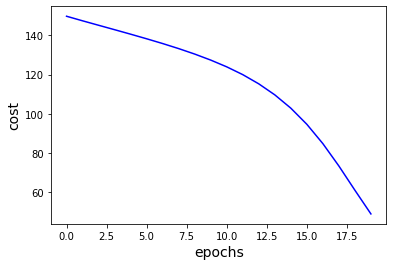

In [11]:
epoch = 20
X = x_train
Y = y_train
m = len(X)
W1, W2, W3, b1, b2, b3 = initialize_params()
y_predict = np.zeros(m)
cost_list = []
for i in range(epoch):     
    # Forward propagation. Inputs: "X, parameters". return: "y_predict, cache". 
    y_predict, cache = forward_prop(X, W1, W2, W3, b1, b2, b3)
    # Cost function. Inputs: "y_predict, Y". Outputs: "cost".
    cost = compute_cost(y_predict, Y.T)
    cost_list.append(cost)
    print ("Cost after iteration % i: % f" % (i, cost))
    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads". 
    W1, W2, W3, b1, b2, b3 = back_prop(W1, W2, W3, b1, b2, b3, X, Y, cache) 
    
plt.plot(range(epoch), cost_list, color='b')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.savefig("cost.png")
plt.show()
plt.close('all')

In [17]:
def predict(X, Y):
    m = X.shape[0]
    print(m)
    y_predict, cache = forward_prop(X, W1, W2, W3, b1, b2, b3)
    p = np.zeros((1, m))
    for i in range(0, m):
        if y_predict [0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0 
    print(len(p==Y))
    print("Accuracy: ", np.sum((p == Y))/m)

In [18]:
predict(x_test, y_test)

100
100
Accuracy:  62.0


In [19]:
predict(x_train, y_train)

900
900
Accuracy:  70.0
